___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
data= pd.read_csv("AutoscotML.csv")
df=data.copy()

In [3]:
df.head()

,price,km,prev_owner,kw,Nr. of Doors,Nr. of Seats,Displacement_cc,Weight_kg,Consumption_comb,Gears,Age,com_Air conditioning,com_Air suspension,com_Armrest,com_Automatic climate control,com_Auxiliary heating,com_Cruise control,com_Electric Starter,com_Electric tailgate,com_Electrical side mirrors,com_Electrically adjustable seats,com_Electrically heated windshield,com_Heads-up display,com_Heated steering wheel,com_Hill Holder,com_Keyless central door lock,com_Leather seats,com_Leather steering wheel,com_Light sensor,com_Lumbar support,com_Massage seats,com_Multi-function steering wheel,com_Navigation system,com_Panorama roof,com_Park Distance Control,com_Parking assist system camera,com_Parking assist system self-steering,com_Parking assist system sensors front,com_Parking assist system sensors rear,com_Power windows,com_Rain sensor,com_Seat heating,com_Seat ventilation,com_Split rear seats,com_Start-stop system,com_Sunroof,com_Tinted windows,com_Wind deflector,com_Windshield,ent_Bluetooth,...,saf_Emergency brake assistant,saf_Emergency system,saf_Fog lights,saf_Head airbag,saf_Immobilizer,saf_Isofix,saf_LED Daytime Running Lights,saf_LED Headlights,saf_Lane departure warning system,saf_Night view assist,saf_Passenger-side airbag,saf_Power steering,saf_Rear airbag,saf_Side airbag,saf_Tire pressure monitoring system,saf_Traction control,saf_Traffic sign recognition,saf_Xenon headlights,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Discount,vat_Non-Discount,Type_New,Type_Used,Body Color_Colored,Body Color_White,Upholstery_Cloth,Upholstery_Leather,Upholstery_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
0,15770,56013,2.0,88.507458,5.0,5.0,1422.0,1220.000000,3.8,5.0,3.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
1,14500,80000,1.0,189.084115,3.0,4.0,1798.0,1255.000000,5.6,7.0,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0
2,14640,83450,1.0,113.986878,4.0,4.0,1598.0,1259.453175,3.8,5.0,3.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
3,14500,73000,1.0,88.507458,3.0,4.0,1422.0,1195.000000,3.8,6.0,3.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,...,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,16790,16200,1.0,88.507458,5.0,5.0,1422.0,1259.453175,4.1,5.0,3.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0


In [4]:
df.sample(5).T

,7032,7541,6389,6685,8116
price,17980.00000,13900.000000,7479.000000,16900.000000,18300.000000
km,25101.00000,20000.000000,126530.000000,14000.000000,10000.000000
prev_owner,1.00000,1.000000,1.000000,1.000000,1.000000
kw,147.51243,103.258701,108.622789,134.102209,103.258701
Nr. of Doors,4.00000,4.000000,5.000000,4.000000,5.000000
...,...,...,...,...,...
Gearing Type_Semi-automatic,0.00000,0.000000,0.000000,0.000000,0.000000
Fuel_Benzine,1.00000,1.000000,0.000000,0.000000,1.000000
Fuel_Diesel,0.00000,0.000000,1.000000,1.000000,0.000000
Fuel_Electric,0.00000,0.000000,0.000000,0.000000,0.000000


In [5]:
df.info

<bound method DataFrame.info of        price     km  prev_owner          kw  Nr. of Doors  Nr. of Seats  \
0      15770  56013         2.0   88.507458           5.0           5.0   
1      14500  80000         1.0  189.084115           3.0           4.0   
2      14640  83450         1.0  113.986878           4.0           4.0   
3      14500  73000         1.0   88.507458           3.0           4.0   
4      16790  16200         1.0   88.507458           5.0           5.0   
...      ...    ...         ...         ...           ...           ...   
15913  39950      0         1.0  197.130247           5.0           5.0   
15914  39885   9900         1.0  221.268645           5.0           5.0   
15915  39875     15         1.0  195.789225           5.0           7.0   
15916  39700     10         1.0  197.130247           5.0           7.0   
15917  40999      0         1.0  221.268645           5.0           5.0   

       Displacement_cc    Weight_kg  Consumption_comb  Gears  Age  

In [6]:
df.describe()

,price,km,prev_owner,kw,Nr. of Doors,Nr. of Seats,Displacement_cc,Weight_kg,Consumption_comb,Gears,Age,com_Air conditioning,com_Air suspension,com_Armrest,com_Automatic climate control,com_Auxiliary heating,com_Cruise control,com_Electric Starter,com_Electric tailgate,com_Electrical side mirrors,com_Electrically adjustable seats,com_Electrically heated windshield,com_Heads-up display,com_Heated steering wheel,com_Hill Holder,com_Keyless central door lock,com_Leather seats,com_Leather steering wheel,com_Light sensor,com_Lumbar support,com_Massage seats,com_Multi-function steering wheel,com_Navigation system,com_Panorama roof,com_Park Distance Control,com_Parking assist system camera,com_Parking assist system self-steering,com_Parking assist system sensors front,com_Parking assist system sensors rear,com_Power windows,com_Rain sensor,com_Seat heating,com_Seat ventilation,com_Split rear seats,com_Start-stop system,com_Sunroof,com_Tinted windows,com_Wind deflector,com_Windshield,ent_Bluetooth,...,saf_Emergency brake assistant,saf_Emergency system,saf_Fog lights,saf_Head airbag,saf_Immobilizer,saf_Isofix,saf_LED Daytime Running Lights,saf_LED Headlights,saf_Lane departure warning system,saf_Night view assist,saf_Passenger-side airbag,saf_Power steering,saf_Rear airbag,saf_Side airbag,saf_Tire pressure monitoring system,saf_Traction control,saf_Traffic sign recognition,saf_Xenon headlights,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Discount,vat_Non-Discount,Type_New,Type_Used,Body Color_Colored,Body Color_White,Upholstery_Cloth,Upholstery_Leather,Upholstery_Other,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG
count,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.00000,15918.000000,15918.000000,15918.000000,15918.000000,...,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.00000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000
mean,18019.257193,31935.047619,1.051451,118.757498,4.660636,4.952884,1424.384389,1355.591206,4.823958,5.810843,1.389496,0.948486,0.003895,0.477635,0.578025,0.016711,0.730242,0.000063,0.069921,0.784835,0.130293,0.059053,0.038259,0.201847,0.461239,0.175964,0.003015,0.611886,0.504900,0.218683,0.022616,0.737970,0.536437,0.039012,0.669431,0.231687,0.048436,0.383591,0.633811,0.927189,0.569607,0.466327,0.052394,0.149956,0.594044,0.02337,0.090715,0.002576,0.000754,0.797211,...,0.209951,0.099007,0.548310,0.137329,0.704737,0.797336,0.371529,0.207815,0.199585,0.004712,0.900678,0.910479,0.054404,0.879445,0.727730,0.744440,0.129099,0.231813,0.164217,0.194560,0.158688,0.139402,0.163211,0.11553,

In [7]:
for i in df.drop(columns ="price"):
    print(f"corr between price and {i:<12}:  {df['price'].corr(df[i])}")

corr between price and km          :  -0.4001106324677109
corr between price and prev_owner  :  -0.09308451767587776
corr between price and kw          :  0.6966410402887501
corr between price and Nr. of Doors:  0.1584713612519483
corr between price and Nr. of Seats:  0.2465568081819137
corr between price and Displacement_cc:  0.2266047256785897
corr between price and Weight_kg   :  0.4723110617317328
corr between price and Consumption_comb:  0.2541376591427777
corr between price and Gears       :  0.5030443849868382
corr between price and Age         :  -0.4726005760082256
corr between price and com_Air conditioning:  0.07553451929284039
corr between price and com_Air suspension:  0.05710596276318729
corr between price and com_Armrest :  0.30331872192390447
corr between price and com_Automatic climate control:  0.414789648819787
corr between price and com_Auxiliary heating:  0.046044145123635256
corr between price and com_Cruise control:  0.12761865892764365
corr between price and com

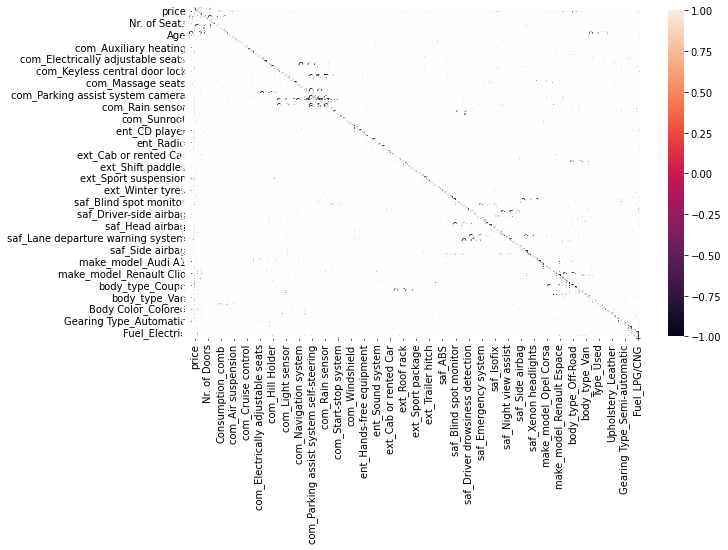

In [8]:
sns.heatmap(df.corr(), annot = True);

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [9]:
X = df.drop("price", axis =1)
y = df["price"]

In [10]:
df.shape

(15918, 137)

In [11]:
X.shape

(15918, 136)

In [12]:
y.shape

(15918,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [15]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11142, 136)
Train target shape   :  (11142,)
Test features shape  :  (4776, 136)
Test target shape    :  (4776,)


In [16]:
def plot_relation(df, target_var):
    num_cols = df.columns
    for col in num_cols:
        if col != target_var:
            plt.figure()
            sns.lmplot(x=col, y=target_var, data=df, height=7)
            plt.xlabel(f"variable name: {col}")
            plt.ylabel("price")

In [ ]:
plot_relation(df,"price")#butun columlarinin targeta gore cor grafigini vercekti
#ama colum sayisi malum cok o yuzde  calisturmadim

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15918.0,18019.257193,7385.960648,13.000000,12850.000000,16900.000000,21900.000000,74600.000000
km,15918.0,31935.047619,37090.278586,0.000000,1553.750000,20397.000000,46899.250000,317000.000000
prev_owner,15918.0,1.051451,0.227370,1.000000,1.000000,1.000000,1.000000,4.000000
kw,15918.0,118.757498,35.771641,53.640884,88.507458,113.986878,138.125275,394.260494
Nr. of Doors,15918.0,4.660636,0.641429,2.000000,4.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...
Gearing Type_Semi-automatic,15918.0,0.029464,0.169107,0.000000,0.000000,0.000000,0.000000,1.000000
Fuel_Benzine,15918.0,0.537191,0.498631,0.000000,0.000000,1.000000,1.000000,1.000000
Fuel_Diesel,15918.0,0.458475,0.498288,0.000000,0.000000,0.000000,1.000000,1.000000
Fuel_Electric,15918.0,0.000314,0.017721,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [21]:
scaler.fit(X_train)  # fit ile egittigimiz x traini scale ediyoruz 

StandardScaler()

In [22]:
X_train_scaled = scaler.transform(X_train) #transform ile icini gezdirip degere atiyoruz
X_train_scaled

array([[ 0.34883295, -0.22532464,  0.42683051, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       [-0.85757916, -0.22532464, -0.13681958, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       [ 1.12243513, -0.22532464, -0.28712626, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       ...,
       [-0.4793528 , -0.22532464, -0.85077635, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       [-0.858651  , -0.22532464,  2.8693142 , ..., -0.92373882,
        -0.0094741 , -0.0671398 ],
       [-0.10742352, -0.22532464,  0.12621713, ..., -0.92373882,
        -0.0094741 , -0.0671398 ]])

In [23]:
X_test_scaled = scaler.transform(X_test)#aynisi x test icin
X_test_scaled

array([[ 2.17085769, -0.22532464, -0.28712626, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       [-0.31777258, -0.22532464,  0.80259723, ..., -0.92373882,
        -0.0094741 , -0.0671398 ],
       [-0.50582731, -0.22532464, -0.66289299, ..., -0.92373882,
        -0.0094741 , -0.0671398 ],
       ...,
       [ 1.92044853, -0.22532464, -0.28712626, ...,  1.08255708,
        -0.0094741 , -0.0671398 ],
       [-0.59819332, -0.22532464, -1.07623638, ..., -0.92373882,
        -0.0094741 , -0.0671398 ],
       [-0.73136973, -0.22532464,  2.1929341 , ..., -0.92373882,
        -0.0094741 , -0.0671398 ]])

In [24]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()#mean 0 mi std 1 mi buna bakiyoz
#cunku datamizin normak dag. dusunuyoruz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [26]:
from sklearn.linear_model import LinearRegression

In [71]:
lm= LinearRegression()

In [72]:
lm.fit(X_train_scaled, y_train)#burda scale etgimiz x kullaniyoruz dikkat

LinearRegression()

In [74]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

#i+ kismi i=lineerden yaninda yazili traini string metodu ile arti yapiyor anladin mi?:: :) 

In [77]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,8.831637e-01,8.772977e-01
mae,1.755142e+03,1.766490e+03
mse,6.351145e+06,6.747298e+06
rmse,2.520148e+03,2.597556e+03


#analizimiz daha objectoif olsun deyi Cross validation yapiyoruzzz

In [78]:
from sklearn.model_selection import cross_validate

In [79]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

#yukarda oljusturdugumuz yerden  geliyor bu score modelin icindeki R2 gibi sonuclari veriyor ne kdar calistigi gibi. Neden negetif oldugu ise score kismiinin icin max calisan bir yontem biz onu negatif e ceviyoruz  

In [80]:
scores 

{'fit_time': array([0.47669387, 0.49959302, 0.52001595, 0.48816609, 0.37934804]),
 'score_time': array([0.00143814, 0.00564885, 0.00102329, 0.00189877, 0.00159407]),
 'test_r2': array([-9.15815253e+22,  8.86618920e-01,  8.71137216e-01, -2.04511302e+24,
         8.78833003e-01]),
 'test_neg_mean_absolute_error': array([-4.73971335e+13, -1.71684782e+03, -1.78051560e+03, -2.41975279e+14,
        -1.74830729e+03]),
 'test_neg_mean_squared_error': array([-5.00742234e+30, -5.80665299e+06, -6.40040815e+06, -1.30453935e+32,
        -6.33735141e+06]),
 'test_neg_root_mean_squared_error': array([-2.23772705e+15, -2.40969977e+03, -2.52990279e+03, -1.14216433e+16,
        -2.51740966e+03])}

In [81]:
pd.DataFrame(scores, index = range(1,6))
#scores u data frame e cevirdik hepsini aldik indexledik.

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.476694,0.001438,-9.158153e+22,-4.739713e+13,-5.007422e+30,-2.237727e+15
2,0.499593,0.005649,8.866189e-01,-1.716848e+03,-5.806653e+06,-2.409700e+03
3,0.520016,0.001023,8.711372e-01,-1.780516e+03,-6.400408e+06,-2.529903e+03
4,0.488166,0.001899,-2.045113e+24,-2.419753e+14,-1.304539e+32,-1.142164e+16
5,0.379348,0.001594,8.788330e-01,-1.748307e+03,-6.337351e+06,-2.517410e+03


In [82]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()
#fittime cikarmis kalan indexdeki kisimlarin ort almis yani
#or r2 ort mae gibi

test_r2                            -4.273389e+23
test_neg_mean_absolute_error       -5.787448e+13
test_neg_mean_squared_error        -2.709227e+31
test_neg_root_mean_squared_error   -2.731874e+15
dtype: float64

In [157]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")
#kiyaslma icin yeniden cektik

,linear_train,linear_test
R2,8.832125e-01,8.775688e-01
mae,1.753005e+03,1.764099e+03
mse,6.348490e+06,6.732392e+06
rmse,2.519621e+03,2.594685e+03


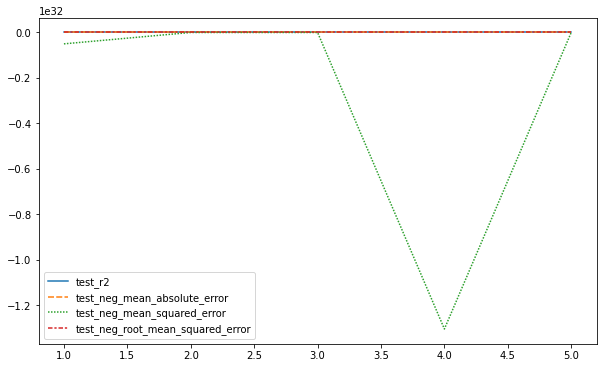

In [84]:
sns.lineplot(data = scores.iloc[:,2:]);

In [85]:
lm.coef_ #liner modelimin katsayilari 

array([-1.32992215e+03,  1.05048468e+01,  2.44279838e+03,  2.77329172e+02,
       -8.75448999e+00, -1.10273810e+02, -2.96750875e+02,  1.59477369e+02,
        2.29556634e+02, -2.00773114e+03,  1.03656072e+02, -6.26550304e+01,
        6.11564976e+01,  1.24147410e+02, -4.95724949e+01,  9.50590212e+01,
       -8.65581988e+00,  2.03980615e+01,  4.86967984e+01,  6.66943706e+01,
        9.69879478e+01,  5.07005611e+02,  7.67845395e+01,  1.18449815e+02,
        6.72052655e+01, -6.90986741e+01,  9.26947869e+01, -2.52137637e+01,
       -2.04877015e+02,  6.16957684e+01,  7.85850709e+01,  1.18689607e+02,
       -5.91919713e+01,  2.71910490e+02, -2.60370589e+01,  2.85193920e+02,
        1.01495140e+02, -1.84003353e+02,  5.10494060e+01, -7.08978075e+01,
        8.86881002e+01,  1.95731845e+02, -8.26709489e+01, -1.39381222e+00,
        1.14542727e+02, -1.26890217e+01, -4.00506838e+01, -1.07510399e+01,
       -2.08675367e+02,  8.78737300e+01,  3.33818736e+02, -3.93977532e+01,
       -9.35179297e+01,  

In [87]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df #lineer modelin kat sayilarini verir

,lm_coef
0,-1.329922e+03
1,1.050485e+01
2,2.442798e+03
3,2.773292e+02
4,-8.754490e+00
...,...
131,4.404214e+15
132,1.640521e+16
133,1.639395e+16
134,3.115857e+14


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [88]:
from sklearn.linear_model import Ridge

In [89]:
from sklearn.model_selection import cross_validate

In [92]:
ridge_model = Ridge(alpha=1, random_state=42)

In [91]:
ridge_model.fit(X_train_scaled, y_train)# belirledigimiz sstandarda gore modeli yeniden egittik

Ridge(alpha=1, random_state=42)

In [90]:
y_pred = ridge_model.predict(X_test_scaled)# tahmin yaptik
y_train_pred = ridge_model.predict(X_train_scaled)

In [93]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

rs# burda bzim degerlerimizn sonuclari yani ridgeli sonuclari almak icin atama yaptik
#burda diikat yukardaki i+ def caliyor 

,ridge_train,ridge_test
R2,8.832165e-01,8.774957e-01
mae,1.753596e+03,1.764860e+03
mse,6.348274e+06,6.736410e+06
rmse,2.519578e+03,2.595460e+03


In [94]:
pd.concat([ls, rs], axis=1)#ikisini ayni anda gormek

,linear_train,linear_test,ridge_train,ridge_test
R2,8.831637e-01,8.772977e-01,8.832165e-01,8.774957e-01
mae,1.755142e+03,1.766490e+03,1.753596e+03,1.764860e+03
mse,6.351145e+06,6.747298e+06,6.348274e+06,6.736410e+06
rmse,2.520148e+03,2.597556e+03,2.519578e+03,2.595460e+03


## For Ridge Regression CV with alpha : 1 

In [103]:
# cv ve alpha degerlrie belirledik
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [104]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.027210,0.001148,0.873108,-1790.828179,-6.938102e+06,-2634.027662
2,0.048122,0.001274,0.887256,-1718.395688,-5.774046e+06,-2402.924541
3,0.026509,0.003746,0.871378,-1778.573705,-6.388425e+06,-2527.533305
4,0.046821,0.001059,0.877887,-1877.178924,-7.789371e+06,-2790.944385
5,0.055131,0.001226,0.878802,-1748.241802,-6.338977e+06,-2517.732535


In [105]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             8.776862e-01
test_neg_mean_absolute_error       -1.782644e+03
test_neg_mean_squared_error        -6.645784e+06
test_neg_root_mean_squared_error   -2.574632e+03
dtype: float64

In [98]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,8.832165e-01,8.774957e-01
mae,1.753596e+03,1.764860e+03
mse,6.348274e+06,6.736410e+06
rmse,2.519578e+03,2.595460e+03


<AxesSubplot:>

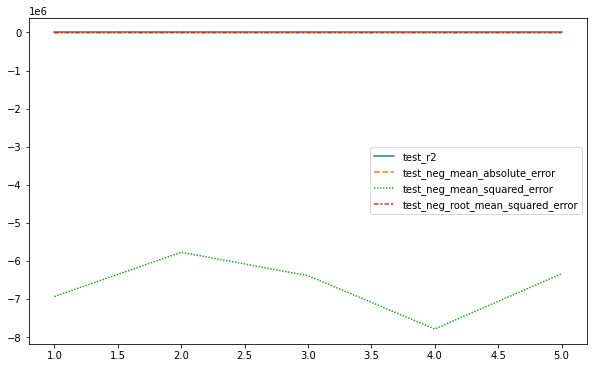

In [106]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
ridge_model.coef_ # burda bunu calistirdigimizda hata aliyoruz lm calistiginda 
#rm calismiyor 
#rm calistiginda lm calismiyor 

In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [111]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-1.329922e+03,-1326.478561
1,1.050485e+01,4.799290
2,2.442798e+03,2442.822661
3,2.773292e+02,275.981329
4,-8.754490e+00,-11.978570
...,...,...
131,4.404214e+15,489.768293
132,1.640521e+16,-166.824421
133,1.639395e+16,163.405623
134,3.115857e+14,90.213272


## Choosing best alpha value with Cross-Validation

In [113]:
from sklearn.linear_model import RidgeCV

In [114]:
alpha_space = np.linspace(0.01, 1, 100)#alph abelirliyoruz
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [115]:
#model belirliuoruz
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [116]:
ridge_cv_model.fit(X_train_scaled, y_train)#yeniden egitiyoruz

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [117]:
ridge_cv_model.alpha_#bu en uygunu kendi seciyor 

1.0

In [118]:
ridge_cv_model.best_score_#sectigi isiginda en iyi score veriyor

-2574.6324856025785

In [119]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)
#yeniden tahmin ettiritoryz

In [122]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs# ridge ile cv seyaptigimiz sonuclari datfrema cekiyorz

,ridge_cv_train,ridge_cv_test
R2,8.832165e-01,8.774957e-01
mae,1.753596e+03,1.764860e+03
mse,6.348274e+06,6.736410e+06
rmse,2.519578e+03,2.595460e+03


In [123]:
pd.concat([ls, rs, rcs], axis = 1)#diger degerlerle kiyazs

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,8.831637e-01,8.772977e-01,8.832165e-01,8.774957e-01,8.832165e-01,8.774957e-01
mae,1.755142e+03,1.766490e+03,1.753596e+03,1.764860e+03,1.753596e+03,1.764860e+03
mse,6.351145e+06,6.747298e+06,6.348274e+06,6.736410e+06,6.348274e+06,6.736410e+06
rmse,2.520148e+03,2.597556e+03,2.519578e+03,2.595460e+03,2.519578e+03,2.595460e+03


In [151]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])
# yukardakinin katsayilari datafranme atiyoruz

In [150]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02
0,-1.329922e+03,-1326.478561,-1326.478561
1,1.050485e+01,4.799290,4.799290
2,2.442798e+03,2442.822661,2442.822661
3,2.773292e+02,275.981329,275.981329
4,-8.754490e+00,-11.978570,-11.978570
...,...,...,...
131,4.404214e+15,489.768293,489.768293
132,1.640521e+16,-166.824421,-166.824421
133,1.639395e+16,163.405623,163.405623
134,3.115857e+14,90.213272,90.213272


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [124]:
from sklearn.linear_model import Lasso, LassoCV

In [125]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.547e+08, tolerance: 6.057e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, random_state=42)

In [126]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [127]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,8.832125e-01,8.775644e-01
mae,1.753008e+03,1.764173e+03
mse,6.348492e+06,6.732636e+06
rmse,2.519621e+03,2.594732e+03


In [128]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,8.831637e-01,8.772977e-01,8.832165e-01,8.774957e-01,8.832165e-01,8.774957e-01,8.832125e-01,8.775644e-01
mae,1.755142e+03,1.766490e+03,1.753596e+03,1.764860e+03,1.753596e+03,1.764860e+03,1.753008e+03,1.764173e+03
mse,6.351145e+06,6.747298e+06,6.348274e+06,6.736410e+06,6.348274e+06,6.736410e+06,6.348492e+06,6.732636e+06
rmse,2.520148e+03,2.597556e+03,2.519578e+03,2.595460e+03,2.519578e+03,2.595460e+03,2.519621e+03,2.594732e+03



## For Lasso CV with Default Alpha : 1

In [129]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.172e+08, tolerance: 4.838e+07
  model = cd_fast.enet_coordinate_descent(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+08, tolerance: 4.913e+07
  model = cd_fast.enet_coordinate_descent(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [130]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.800101,0.001551,0.873565,-1788.788988,-6.913109e+06,-2629.279113
2,0.817180,0.001486,0.887323,-1717.528856,-5.770605e+06,-2402.208390
3,0.811434,0.001184,0.871448,-1777.097263,-6.384950e+06,-2526.845847
4,0.817674,0.001842,0.877834,-1876.928198,-7.792718e+06,-2791.544027
5,0.801413,0.001817,0.878888,-1746.793941,-6.334470e+06,-2516.837291


In [131]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             8.778118e-01
test_neg_mean_absolute_error       -1.781427e+03
test_neg_mean_squared_error        -6.639170e+06
test_neg_root_mean_squared_error   -2.573343e+03
dtype: float64

In [133]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,8.832125e-01,8.775644e-01
mae,1.753008e+03,1.764173e+03
mse,6.348492e+06,6.732636e+06
rmse,2.519621e+03,2.594732e+03


<AxesSubplot:>

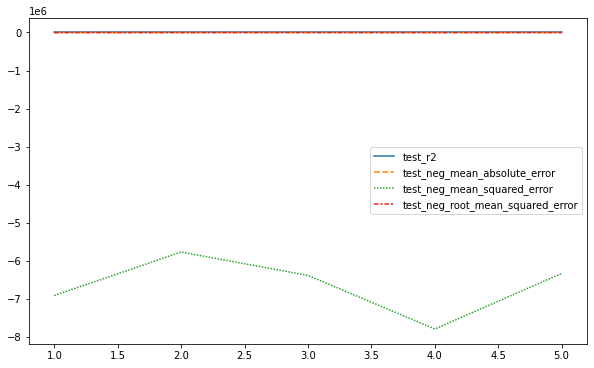

In [132]:
sns.lineplot(data = scores.iloc[:,2:])

In [134]:
lasso_model.coef_

array([-1324.73078486,     3.06790986,  2444.44215644,   273.89892706,
          -9.61587815,  -105.22238347,  -271.0997746 ,   140.67277776,
         242.07000061, -2012.39482911,   104.34015679,   -56.23116597,
          65.80486932,   129.6673373 ,   -48.05263961,    90.996592  ,
          -9.84183207,     8.75680961,    43.7831192 ,    65.39282942,
         103.73434519,   510.79474761,    72.9885379 ,   106.83584988,
          77.59667001,   -67.08596179,    82.71801395,   -24.11715551,
        -197.40279667,    55.61897937,    72.09698664,   125.66675075,
         -70.45216105,   260.43040934,   -14.28099399,   288.94393316,
          88.55706527,  -177.76130305,    44.91739931,   -70.64995279,
          86.90830096,   186.2898743 ,   -81.6538839 ,    -0.08527896,
         114.93099426,   -16.81913862,   -33.86072545,   -17.13932047,
        -210.03399498,    88.19990943,   328.66166401,   -36.21158906,
         -83.43108022,    16.72298579,    25.24804178,   -67.7042825 ,
      

In [135]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

### Choosing best alpha value with Cross-Validation


In [137]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [138]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [139]:
lasso_cv_model.alpha_

1.0

In [140]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([0]),)

In [141]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [142]:
lasso_cv_model.mse_path_[99].mean()

6645433.5558426995

In [143]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [144]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,8.832125e-01,8.775688e-01
mae,1.753005e+03,1.764099e+03
mse,6.348490e+06,6.732392e+06
rmse,2.519621e+03,2.594685e+03


In [145]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,8.831637e-01,8.772977e-01,8.832165e-01,8.774957e-01,8.832165e-01,8.774957e-01,8.832125e-01,8.775644e-01,8.832125e-01,8.775688e-01
mae,1.755142e+03,1.766490e+03,1.753596e+03,1.764860e+03,1.753596e+03,1.764860e+03,1.753008e+03,1.764173e+03,1.753005e+03,1.764099e+03
mse,6.351145e+06,6.747298e+06,6.348274e+06,6.736410e+06,6.348274e+06,6.736410e+06,6.348492e+06,6.732636e+06,6.348490e+06,6.732392e+06
rmse,2.520148e+03,2.597556e+03,2.519578e+03,2.595460e+03,2.519578e+03,2.595460e+03,2.519621e+03,2.594732e+03,2.519621e+03,2.594685e+03


In [146]:
lasso_cv_model.coef_

array([-1324.62827293,     3.08670702,  2443.87521595,   273.79997972,
          -9.65404143,  -105.13193337,  -272.85977674,   139.95472013,
         242.01825422, -2012.65486889,   104.37155745,   -56.24431699,
          65.41419849,   129.72933468,   -48.0450106 ,    90.75830848,
          -9.8342864 ,     8.80850697,    43.72900638,    64.98785883,
         103.76004534,   510.7018825 ,    72.91671116,   106.77314502,
          77.49949828,   -67.08898254,    82.75594281,   -24.10783445,
        -197.34789793,    55.75599331,    72.20719016,   125.64096913,
         -70.4301246 ,   260.47375815,   -14.46639198,   288.92808476,
          88.38409253,  -177.65917809,    44.91931619,   -70.58761889,
          86.98655586,   186.38704299,   -81.66933574,    -0.10852999,
         114.96507732,   -16.72775646,   -33.8118554 ,   -17.14751964,
        -210.17248523,    88.36178775,   328.63707396,   -36.16396946,
         -83.32645026,    16.55264534,    25.41729426,   -67.59206539,
      

In [147]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [152]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,-1.329922e+03,-1326.478561,-1326.478561,-1324.730785,-1324.628273
1,1.050485e+01,4.799290,4.799290,3.067910,3.086707
2,2.442798e+03,2442.822661,2442.822661,2444.442156,2443.875216
3,2.773292e+02,275.981329,275.981329,273.898927,273.799980
4,-8.754490e+00,-11.978570,-11.978570,-9.615878,-9.654041
...,...,...,...,...,...
131,4.404214e+15,489.768293,489.768293,467.851858,384.984342
132,1.640521e+16,-166.824421,-166.824421,-265.567741,-265.337489
133,1.639395e+16,163.405623,163.405623,57.481484,57.257498
134,3.115857e+14,90.213272,90.213272,87.224745,87.238487


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___